# Check Gaussian Fit of Filter transmission


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- Creation date : February 28th 2021
- update : May 2021
- update : October 23th 2021
- **CC : kernel anaconda3pbspzrail**

- **NERSC : use kernel desc-python (desc-python environnement cloned and extended by the user)**

- last verification : January 6th 2022


**Purpose is to view the Gaussian Mixture decomposition of filter transmission**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import sys
import os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/global/homes/d/dagoret/mydesc/mydesc/bin/python
3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:59:51) 
[GCC 9.4.0]


In [3]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [4]:
import sys
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/global/homes/d/dagoret/mydesc/mydesc/bin/python
3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:59:51) 
[GCC 9.4.0]


In [5]:
import configparser

In [6]:
! ls tmp

delight_data	       parametersTest_15.cfg  parametersTest_3.cfg
parametersTest.cfg     parametersTest_16.cfg  parametersTest_4.cfg
parametersTest_1.cfg   parametersTest_17.cfg  parametersTest_5.cfg
parametersTest_10.cfg  parametersTest_18.cfg  parametersTest_6.cfg
parametersTest_11.cfg  parametersTest_19.cfg  parametersTest_7.cfg
parametersTest_12.cfg  parametersTest_2.cfg   parametersTest_8.cfg
parametersTest_13.cfg  parametersTest_20.cfg  parametersTest_9.cfg
parametersTest_14.cfg  parametersTest_21.cfg


## Defines file location

In [7]:
#basedelight_datapath = resource_filename('delight', '../data')
#basedelight_datapath = "../tmp/delight_indata"
basedelight_datapath = "../../rail/estimation/data"

In [8]:
filename_config="tmp/parametersTest.cfg"

In [9]:
#dir_filter="./data/FILTERS"
#dir_filter = os.path.join(basedelight_datapath,"FILTERS")
dir_filter = os.path.join(basedelight_datapath,"FILTER")

In [10]:
#filename_filters = ["lsst_u.res","lsst_g.res","lsst_r.res","lsst_i.res","lsst_z.res","lsst_y.res"]
#filename_fitfilters = ["lsst_u_gaussian_coefficients.txt", "lsst_g_gaussian_coefficients.txt",
#             "lsst_r_gaussian_coefficients.txt","lsst_i_gaussian_coefficients.txt",
#            "lsst_z_gaussian_coefficients.txt", "lsst_y_gaussian_coefficients.txt"]

In [11]:
filename_filters =["DC2LSST_u.res","DC2LSST_g.res","DC2LSST_r.res","DC2LSST_i.res","DC2LSST_z.res","DC2LSST_y.res"]

In [12]:
filename_fitfilters = ["DC2LSST_u_gaussian_coefficients.txt", "DC2LSST_g_gaussian_coefficients.txt",
             "DC2LSST_r_gaussian_coefficients.txt","DC2LSST_i_gaussian_coefficients.txt",
            "DC2LSST_z_gaussian_coefficients.txt", "DC2LSST_y_gaussian_coefficients.txt"]

## Decode parameter file

In [13]:
config = configparser.ConfigParser()
if not os.path.isfile(filename_config):
    raise Exception(filename_config +' : file not found')
config.read(filename_config)
config.sections()

['Bands', 'Templates', 'Simulation', 'Training', 'Target', 'Other']

In [14]:
numCoefs  = int(config["Bands"]["numCoefs"])
bandNames = config["Bands"]['names']
bandColors = ["b","g","r","orange","grey","k"]
#filter_dir = config ["Bands"]['bands_directory']

In [15]:
band_names=bandNames.split(" ")

In [16]:
Nbands=len(band_names)

## Plot filters and fitted filter transmission

In [17]:
! ls $dir_filter

DC2LSST_g.res			     DC2LSST_u.res
DC2LSST_g_gaussian_coefficients.txt  DC2LSST_u_gaussian_coefficients.txt
DC2LSST_i.res			     DC2LSST_y.res
DC2LSST_i_gaussian_coefficients.txt  DC2LSST_y_gaussian_coefficients.txt
DC2LSST_r.res			     DC2LSST_z.res
DC2LSST_r_gaussian_coefficients.txt  DC2LSST_z_gaussian_coefficients.txt


../../rail/estimation/data/FILTER/DC2LSST_u.res


No handles with labels found to put in legend.


../../rail/estimation/data/FILTER/DC2LSST_g.res


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


../../rail/estimation/data/FILTER/DC2LSST_r.res
../../rail/estimation/data/FILTER/DC2LSST_i.res
../../rail/estimation/data/FILTER/DC2LSST_z.res
../../rail/estimation/data/FILTER/DC2LSST_y.res


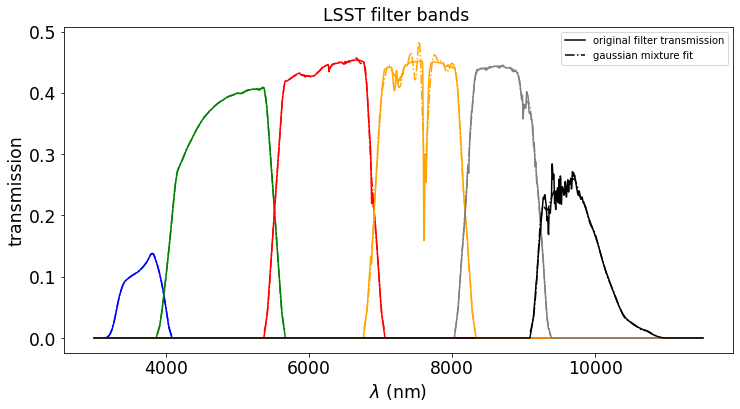

In [18]:
plt.figure(figsize=(12,6))
for idx_filter in np.arange(Nbands):
    
    # read coefficients of fits
    full_filename_fitfilter=os.path.join(dir_filter,filename_fitfilters[idx_filter])
    coefs=np.loadtxt(full_filename_fitfilter)
    
    # read filters
    full_filename_filter=os.path.join(dir_filter,filename_filters[idx_filter])
    print(full_filename_filter)
    data = np.genfromtxt(full_filename_filter)
    
    x, y = data[:, 0], data[:, 1]
    #y /= x  # divide by lambda
    # Only consider range where >1% max
    ind = np.where(y > 0.01*np.max(y))[0]
    lambdaMin, lambdaMax = x[ind[0]], x[ind[-1]]
    
    xf = np.linspace(lambdaMin, lambdaMax, num=1000)
    yy = 0*xf
    for i in range(numCoefs):
        yy += coefs[i, 0] * np.exp(-0.5*((coefs[i, 1] - xf)/coefs[i, 2])**2.0)
    if idx_filter==5:    
        plt.plot(x,y,"-",color=bandColors[idx_filter],label="original filter transmission")
        plt.plot(xf,yy,"-.",color=bandColors[idx_filter],label='gaussian mixture fit')
    else:
        plt.plot(x,y,"-",color=bandColors[idx_filter])
        plt.plot(xf,yy,"-.",color=bandColors[idx_filter])
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("transmission")
    plt.title("LSST filter bands ")
    plt.legend(loc="upper right")